In [1]:
#imports
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#Use the MNIST "Fashion" Dataset included in keras.
#60,000 images for training and 10,000 images for testing.
fashion_mnist = keras.datasets.fashion_mnist 

#split into training and testing labels
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#set labels for classification
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [13]:
#60,000 28x28 images
train_images.shape

(60000, 28, 28)

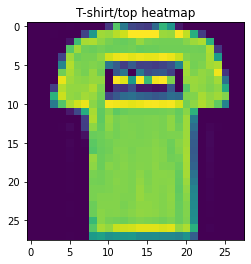

In [15]:
#a shirt
plt.imshow(train_images[1])
#different classifications are encoded as ints from 0-9,
#corresponding to an entry in the "class_names" array.
plt.title(class_names[train_labels[1]]+" heatmap")
plt.show()

In [16]:
#preprocess: normalize dataset from 0-255.0 range to 0-1.0
train_images = train_images / 255.0
test_images = test_images / 255.0

In [18]:
#Build model, a basic feedforward neural network.
#softmax activation makes sure all of the probabilities in the output layer add to 1.0
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #28x28 input layer, flattened to single 784x1 layer
    keras.layers.Dense(128, activation='relu'), #rectified linear hidden layer
    keras.layers.Dense(10, activation='softmax') #output layer for 10 categories
])

In [20]:
"""define optimization algorithm and loss function.
categorical cross entropy defines the difference between two probability distributions
and is appropriate for classification problems.
the adam optimizer is a for of stochastic gradient descent
which is a version of gradient descent with random sampling
to more efficiently compute the gradient ."""
model.compile(optimizer="adam",
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
#train the model
model.fit(train_images, train_labels, epochs=10)

2021-10-25 11:22:17.586236: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4995 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3788 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3400 - accuracy: 0.8755
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3162 - accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2987 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2824 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2696 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2580 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2490 - accuracy: 0.9083: 0s - loss: 0.2502 - accuracy
Epoch 10/10
1875/1875 [=============================

In [22]:
#now test on the testing data to show our true accuracy
#as the model could be overfitting to the training dataset
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy: {}'.format(test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.3671 - accuracy: 0.8646
Test accuracy: 0.8646000027656555


<p> Not bad!. </p>

In [25]:
#predict on the test images
predictions = model.predict(test_images)

<p> Let's check some of these predictions by hand. </p>

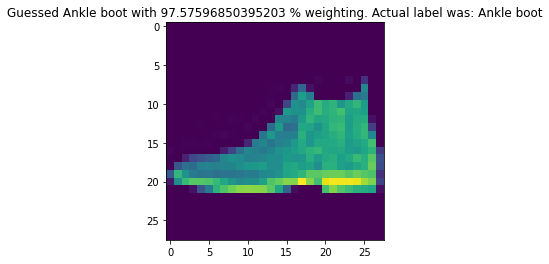

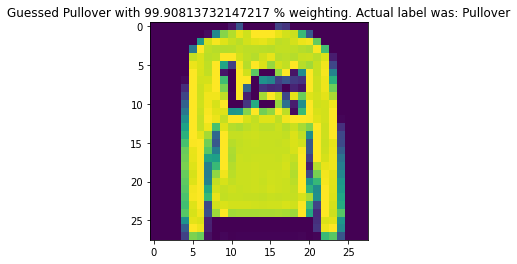

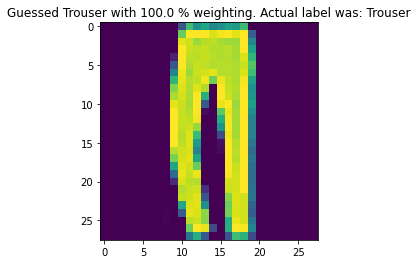

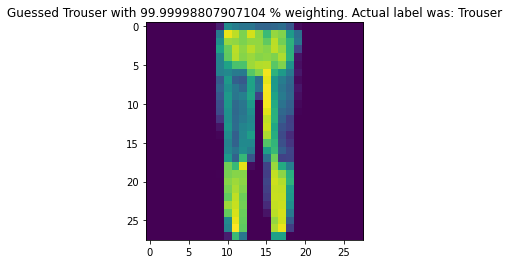

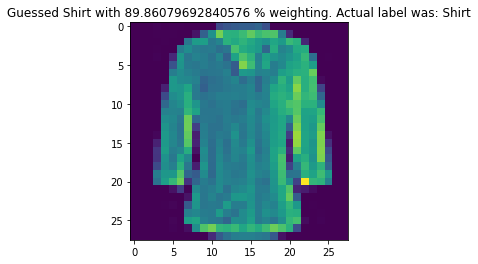

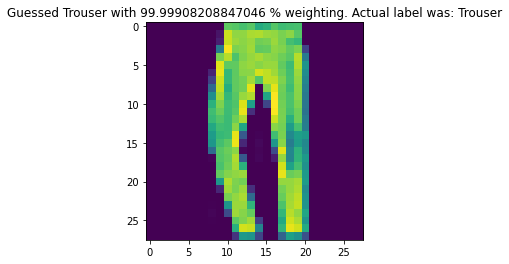

In [55]:
def guess_image(predictions, index):
    guess = np.argmax(predictions[index])
    plt.imshow(test_images[index])
    title=""
    title+="Guessed {}".format(class_names[guess])
    title+=" with {} % weighting.".format(np.max(predictions[index])*100)
    title+=" Actual label was: {}".format(class_names[test_labels[index]])
    plt.title(title)
    plt.show()
    
for i in range(6):
    guess_image(predictions,i)

<p> Looks correct! </p>